In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
train_data = pd.read_csv('BC7-LitCovid-Train.csv')

In [3]:
train_data.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,NaN,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment


1) pmid, journal, pub_type and doi doesn't seem to add any value to the determination of the label
2) label is multi-valued. It is ; separated.
3) Abstract is a full body of text. Probably the most useful information imo (Gajesh)
4) keywords is also a collection of ; separrated words. Usually found in paper, but may or may not be in the abstract. --> Could hint at processing this separately
5) \- is not a separator for most words. (eg: covid-19, il-6, sars-cov-2, tnf-alpha)

In [4]:
example_datapoint = train_data.iloc[0]

In [5]:
print(example_datapoint)

pmid                                                 32519164
journal                                 J Thromb Thrombolysis
title       Potential role for tissue factor in the pathog...
abstract    In December 2019, a new and highly contagious ...
keywords    covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...
pub_type                               Journal Article;Review
authors     Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...
doi                                10.1007/s11239-020-02172-x
label                                     Treatment;Mechanism
Name: 0, dtype: object


In [6]:
example_datapoint['abstract']

'In December 2019, a new and highly contagious infectious disease emerged in Wuhan, China. The etiologic agent was identified as a novel coronavirus, now known as Severe Acute Syndrome Coronavirus-2 (SARS-CoV-2). Recent research has revealed that virus entry takes place upon the union of the virus S surface protein with the type I transmembrane metallo-carboxypeptidase, angiotensin converting enzyme 2 (ACE-2) identified on epithelial cells of the host respiratory tract. Virus triggers the synthesis and release of pro-inflammatory cytokines, including IL-6 and TNF-alpha and also promotes downregulation of ACE-2, which promotes a concomitant increase in levels of angiotensin II (AT-II). Both TNF-alpha and AT-II have been implicated in promoting overexpression of tissue factor (TF) in platelets and macrophages. Additionally, the generation of antiphospholipid antibodies associated with COVID-19 may also promote an increase in TF. TF may be a critical mediator associated with the developme

In [7]:
example_datapoint['keywords'].split(';')

['covid-19', 'il-6', 'sars-cov-2', 'tnf-alpha', 'thrombosis', 'tissue factor']

In [8]:
# check for null values
train_data.isna().sum()

pmid           0
journal        0
title          0
abstract       0
keywords    5992
pub_type       0
authors      101
doi          554
label          0
dtype: int64

In [9]:
#We can see that abstract is always there, but in some cases, keywords, author list, and doi is not there

In [10]:
train_data.dtypes

pmid         int64
journal     object
title       object
abstract    object
keywords    object
pub_type    object
authors     object
doi         object
label       object
dtype: object

In [11]:
processed_train_data = pd.DataFrame()
def split(string):
    return str(string).split(';')
processed_train_data['keywords']=train_data['keywords'].apply(split)
processed_train_data['authors']=train_data['authors'].apply(split)
processed_train_data['pub_type']=train_data['pub_type'].apply(split)
processed_train_data['label']=train_data['label'].apply(split)
processed_train_data['journal']=train_data['journal']
processed_train_data['title']=train_data['title']
processed_train_data['abstract']=train_data['abstract']
processed_train_data['doi']=train_data['doi']



In [12]:
processed_train_data

,keywords,authors,pub_type,label,journal,title,abstract,doi
0,"[covid-19, il-6, sars-cov-2, tnf-alpha, thromb...","[Bautista-Vargas, Mario, Bonilla-Abadia, Fabio...","[Journal Article, Review]","[Treatment, Mechanism]",J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",10.1007/s11239-020-02172-x
1,"[covid-19, coronavirus, dietary therapy, herba...","[Panyod, Suraphan, Ho, Chi-Tang, Sheen, Lee-Yan]","[Journal Article, Review]","[Treatment, Prevention]",J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",10.1016/j.jtcme.2020.05.004
2,"[cerebrospinal fluid, igg, manic-like symptoms...","[Lu, Shaojia, Wei, Ning, Jiang, Jiajun, Wu, Li...","[Case Reports, Journal Article]",[Case Report],J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",10.1016/j.jad.2020.08.031
3,"[dental education, dental public health, infec...","[Meng, L, Ma, B, Cheng, Y, Bian, Z]","[Journal Article, Research Support, Non-U.S. G...",[Prevention],J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,10.1177/0022034520962087
4,[nan],"[Eslami, Gholamali, Mousaviasl, Sajedeh, Radma...","[Journal Article, Randomized Controlled Trial,...",[Treatment],J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,10.1093/jac/dkaa331
...,...,...,...,...,...,...,...,...
24955,"[coronavirus, football, illness, soccer, train...","[Eirale, Cristiano, Bisciotti, Giannicola, Cor...","[Journal Article, Review]",[Prevention],Biol Sport,Medical recommendations for home-confined foot...,"In early 2020, the world is facing a global em...",10.5114/biolsport.2020.94348
24956,[nan],"[Blain, Maxime, T Kassin, Michael, Varble, Nic...",[Journal Article],[Diagnosis],Diagn Interv Radiol,Determination of disease severity in COVID-19 ...,PURPOSE: Chest X-ray plays a key role in diagn...,10.5152/dir.2020.20205
24957,"[coronavirus disease 2019, disease outcome, el...","[Tezcan, M E, Dogan Gokce, G, Sen, N, Zorlutun...",[Journal Article],"[Treatment, Diagnosis]",New Microbes New Infect,Baseline electrolyte abnormalities would be re...,Electrolyte abnormalities are not uncommon in ...,10.1016/j.nmni.2020.100753
24958,"[covid-19, sars-cov-2, health system resources...","[Dayal, Ashlesha K, Razavi, Armin S, Jaffer, A...","[Journal Article, Review]",[Prevention],J Perinat Med,COVID-19 in obstetrics 2020: the experience at...,The global spread of the SARS-CoV-2 virus duri...,10.1515/jpm-2020-0365


In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

In [14]:
label_mlb = MultiLabelBinarizer()
label_mle = label_mlb.fit_transform(processed_train_data['label'])
print(label_mle.shape)
print(label_mlb.classes_)

(24960, 7)
['Case Report' 'Diagnosis' 'Epidemic Forecasting' 'Mechanism' 'Prevention'
 'Transmission' 'Treatment']


In [15]:
label_mle[0:5]

array([[0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [16]:
label_anal = np.sum(label_mle, axis=1)
print(np.max(label_anal))

5


In [17]:
label_anal = np.sum(label_mle, axis=0)
print(label_anal)

[ 2063  6193   645  4438 11102  1088  8717]


In [18]:
author_mlb = MultiLabelBinarizer()
author_mle = author_mlb.fit_transform(processed_train_data['authors'])
print(author_mle.shape)

(24960, 142172)


In [19]:
print(author_mlb.classes_)

['A Aljabali, Alaa A' 'A Beccara, Lia' 'A Cienfuegos, Javier' ...
 'von dem Knesebeck, Olaf' 'von der Thusen, Jan' 'von der Thusen, Jan H']


In [38]:
z = np.sum(author_mle, axis=1)
z1 = np.sum(author_mle, axis=0)
# print(np.argmax(z1))
print(np.max(z))


1015
nan


In [39]:
print(author_mlb.classes_[np.argmax(z1)])

nan


In [40]:
z1[np.argmax(z1)] =0
print(author_mlb.classes_[np.argmax(z1)])
print(np.max(z1))

Yuen, Kwok-Yung
46


In [22]:
mlb = MultiLabelBinarizer()
processed_train_data['mlb_publication'] = processed_train_data['pub_type'].apply(mlb.fit_transform)
# mle = mlb.fit_transform(processed_train_data['pub_type'])
print(processed_train_data['mlb_publication'].shape)
processed_train_data['mlb_publication'][0]

(24960,)


array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [23]:
# processed_train_data['pub_type'][0]

['Journal Article', 'Review']

In [24]:
print(mlb.classes_)

[' ' 'A' 'J' 'R' 'a' 'c' 'e' 'i' 'l' 'n' 'o' 'r' 't' 'u' 'v' 'w']


In [25]:
import scipy


In [26]:
output_labels = pd.DataFrame(label_mle,columns=label_mlb.classes_)

In [27]:
correlation = output_labels.corr()

<AxesSubplot:>

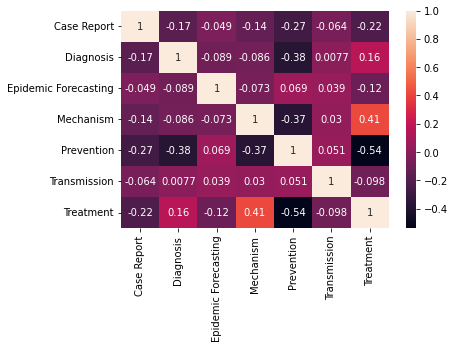

In [29]:
import seaborn as sb

sb.heatmap(correlation, annot = True)

In [34]:
import matplotlib.pyplot as plt

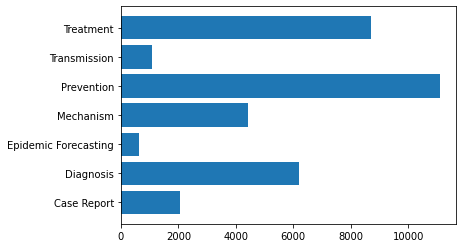

In [37]:
plt.barh(label_mlb.classes_, label_anal)
plt.show()